In [1]:
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install astropy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from igimf import utilities as util
from igimf import instance as inst
from igimf import downsizing as d
#from igimf.optimal_sampling import OptimalSampling_Stellar, OptimalSampling_Clusters
import matplotlib.pyplot as plt
import scipy.integrate as integr

## Downsizing

It is possible to access the docstring of any class or function by putting a question mark (?) after the class/function of interest:

In [3]:
d.Downsizing?

Init signature: d.Downsizing(M_igal: float) -> None
Docstring:     
Downsizing relations as introduced by Thomas et al. (2005)

.. code-block:: python
    # Create a new instance of the Downsizing class with M_igal = 1e10 Msun
    downsizing_example = Downsizing(M_igal=1e10)

    # Access the variables
    downsizing_time_example = downsizing_example.SFR
    SFR_example = downsizing_example.SFR
    M_igal_example = downsizing_example.M_igal
    
    # Access their values (for computations)
    print(downsizing_time_example.value)
    print(SFR_example.value)
    print(M_igal_example.value) 
    
    # Access their units
    print(downsizing_time_example.unit)
    print(SFR_example.unit)
    print(M_igal_example.unit)
Init docstring:
M_igal             [Msun] 
downsizing_time    [Gyr]
SFR                [Msun/yr]
File:           ~/Downloads/GitHub/snakeIGIMF/igimf/downsizing.py
Type:           type
Subclasses:     

In [4]:
downsizing_1e10 = d.Downsizing(M_igal=1e10)

1.00e+10 solMass
9.69e-01 Gyr
1.03e+01 solMass / yr


In [5]:
downsizing_1e10.M_igal

<Quantity 1.e+10 solMass>

In [6]:
downsizing_1e10.downsizing_time

<Quantity 0.96899451 Gyr>

In [7]:
downsizing_1e10.SFR

<Quantity 10.3199759 solMass / yr>

Appending a `.value' to the variables removes the units.

In [8]:
downsizing_1e10.SFR.value

np.float64(10.319975895585161)

## Stellar IMF

### Play around with broken stellar IMFs normalized to 1 at norm_wrt = 150 (default) and norm_wrt = 1

In [9]:
Mstar_v = util.np.logspace(np.log10(0.01), np.log10(200))

In [10]:
K01_params = {
                            'alpha1': 1.3,
                            'alpha2': 2.3,
                            'alpha3': 2.3,
                            'Ml': 0.08,
                            'Mlim12': 0.5,
                            'Mlim23': 1.,
                            'Mu': 150
                        }

In [11]:
canonical_IMF = util.Kroupa01(sIMF_params=K01_params)

In [12]:
canonical_IMF(149.9)

array(2.00307004)

In [13]:
canonical_IMF(150)

array(2.)

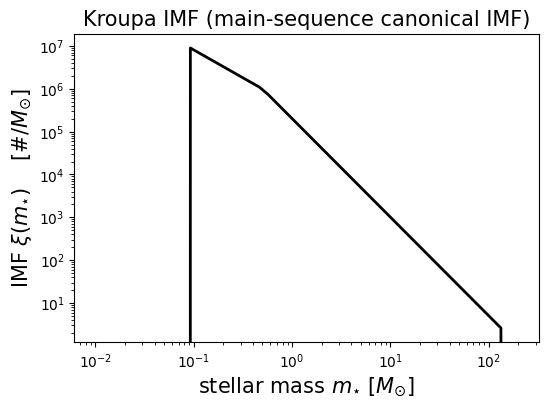

In [14]:
fig = plt.figure(figsize=(6, 4))
plt.loglog(Mstar_v, canonical_IMF(Mstar_v), color='black', lw=2)
plt.title('Kroupa IMF (main-sequence canonical IMF)', fontsize=15)
plt.ylabel(r'IMF $\xi(m_{\star}) \quad$ [#/$M_{\odot}$]', fontsize=15)
plt.xlabel(r'stellar mass $m_{\star}$ [$M_{\odot}$]', fontsize=15)
plt.savefig('figs/Kroupa_IMF.pdf')

In [15]:
print(f"Integral of the canonical IMF (number of stars it produces) {integr.simpson(canonical_IMF(Mstar_v), x=Mstar_v):.2e} Msun/yr")

Integral of the canonical IMF (number of stars it produces) 1.59e+06 Msun/yr


In [16]:
topheavy_params = {
                            'alpha1': 0.3,
                            'alpha2': 1.3,
                            'alpha3': 1.3,
                            'Ml': 0.08,
                            'Mlim12': 0.5,
                            'Mlim23': 1.,
                            'Mu': 150
                        }

In [17]:
topheavy_IMF = util.Kroupa01(sIMF_params=topheavy_params)

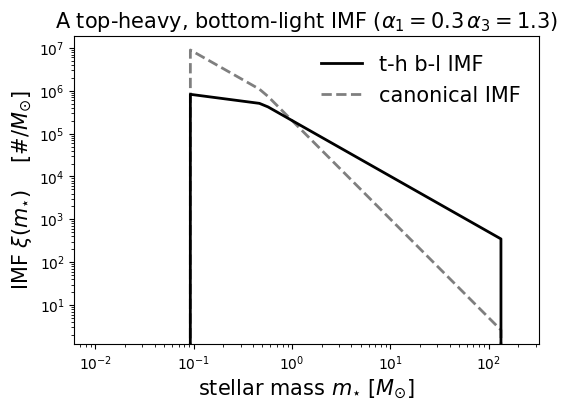

In [18]:
fig = plt.figure(figsize=(6, 4))
plt.loglog(Mstar_v, topheavy_IMF(Mstar_v), color='black', lw=2, label='t-h b-l IMF')
plt.loglog(Mstar_v, canonical_IMF(Mstar_v), color='black', lw=2, alpha=0.5, linestyle='--', label='canonical IMF')
plt.title(r'A top-heavy, bottom-light IMF ($\alpha_1=0.3 \, \alpha_3=1.3$)', fontsize=15)
plt.ylabel(r'IMF $\xi(m_{\star}) \quad$ [#/$M_{\odot}$]', fontsize=15)
plt.xlabel(r'stellar mass $m_{\star}$ [$M_{\odot}$]', fontsize=15)
plt.legend(fontsize=15, frameon=False)

In [19]:
topheavy_IMF_norm1 = util.Kroupa01(sIMF_params=topheavy_params, norm_wrt=1)
canonical_IMF_norm1 = util.Kroupa01(sIMF_params=K01_params, norm_wrt=1)

In [20]:
util.Kroupa01?

Signature:
util.Kroupa01(
    norm_wrt=150.0,
    os_norm=1.0,
    sIMF_params={'alpha1': 1.3, 'alpha2': 2.3, 'alpha3': 2.3, 'Ml': 0.08, 'Mlim12': 0.5, 'Mlim23': 1.0, 'Mu': 150},
)
Docstring:
IMF as a broken power law, from Kroupa (2001).
https://ui.adsabs.harvard.edu/abs/2001MNRAS.322..231K/abstract 

The parameters are adjustable inside of the sIMF_params dictionary.

norm_wrt is the mass at which the normalisation is 1. Defaults to 150 Msun.
norm_wrt helps when using this function manually. Valid values are:
    Mlim23 < norm_wrt < Mu
os_norm is the normalisation of the optimal IMF, used in the StellarIMF class.
File:      ~/Downloads/GitHub/snakeIGIMF/igimf/utilities.py
Type:      function

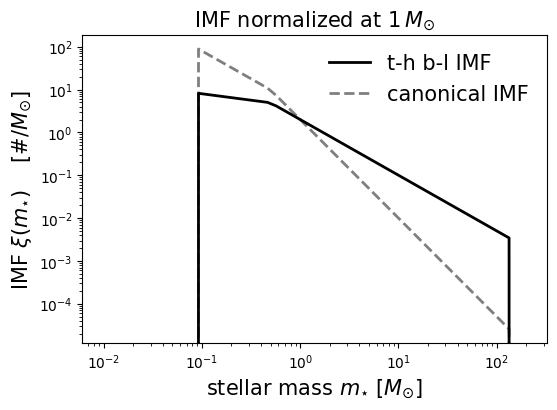

In [21]:
fig = plt.figure(figsize=(6, 4))
plt.loglog(Mstar_v, topheavy_IMF_norm1(Mstar_v), color='black', lw=2, label='t-h b-l IMF')
plt.loglog(Mstar_v, canonical_IMF_norm1(Mstar_v), color='black', lw=2, alpha=0.5, linestyle='--', label='canonical IMF')
plt.title(r'IMF normalized at $1 \, M_{\odot}$', fontsize=15)
plt.ylabel(r'IMF $\xi(m_{\star}) \quad$ [#/$M_{\odot}$]', fontsize=15)
plt.xlabel(r'stellar mass $m_{\star}$ [$M_{\odot}$]', fontsize=15)
plt.legend(fontsize=15, frameon=False)
plt.savefig('figs/Kroupa_IMF_comparison_norm1.pdf')

## Embedded cluster mass function

In [22]:
M_ecl_v = np.logspace(np.log10(5), 10)

In [23]:
Parameters_inst = inst.Parameters(metal_mass_fraction=0.001, SFR=1)

In [24]:
Parameters_inst.solar_metallicity

0.0134

In [25]:
ECMF_inst = inst.ECMF(SFR=1)

Mtot = 10000000.0, real_upper_limit/upper_lim = 8.317496245181674e-05, k = np.float64(831818.8110165405)


In [26]:
ECMF_inst.beta_ECMF

np.float64(2.0)

In [27]:
ECMF_inst.M_max

831749.6245181675

In [28]:
ECMF_inst.Mtot

10000000.0

In [29]:
ECMF_inst.k_ecl

np.float64(831818.8110165405)

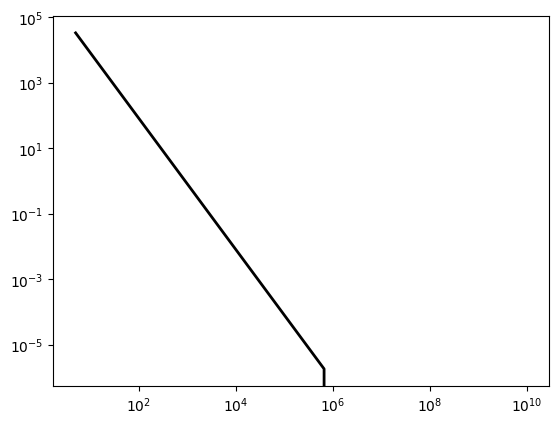

In [30]:
plt.loglog(M_ecl_v, ECMF_inst.ECMF_func(M_ecl_v), color='black', lw=2)

## Stellar IMF

In [31]:
m_star_v = np.logspace(-2, 2.15)

In [32]:
m_star_v

array([1.00000000e-02, 1.21532905e-02, 1.47702469e-02, 1.79507101e-02,
       2.18160194e-02, 2.65136420e-02, 3.22227992e-02, 3.91613038e-02,
       4.75938700e-02, 5.78422127e-02, 7.02973212e-02, 8.54343763e-02,
       1.03830879e-01, 1.26188683e-01, 1.53360772e-01, 1.86383801e-01,
       2.26517647e-01, 2.75293475e-01, 3.34572157e-01, 4.06615260e-01,
       4.94171336e-01, 6.00580779e-01, 7.29903265e-01, 8.87072638e-01,
       1.07808514e+00, 1.31022819e+00, 1.59235837e+00, 1.93523938e+00,
       2.35195264e+00, 2.85839635e+00, 3.47389211e+00, 4.22192199e+00,
       5.13102442e+00, 6.23588301e+00, 7.57864975e+00, 9.21055318e+00,
       1.11938528e+01, 1.36042145e+01, 1.65335970e+01, 2.00937606e+01,
       2.44205309e+01, 2.96789806e+01, 3.60697272e+01, 4.38365871e+01,
       5.32758776e+01, 6.47477215e+01, 7.86897866e+01, 9.56339832e+01,
       1.16226758e+02, 1.41253754e+02])

In [33]:
IMF_inst = inst.StellarIMF(SFR=1, metal_mass_fraction=0.001, M_ecl=1e5)

If the power law is broken at 0.5 (Mlim12=0.5) and 1 (Mlim23=1.0) solar masses,a1/a2 = np.float64(2.0) should equal 2, anda2/a3 = np.float64(1.0) should equal 1


In [34]:
IMF_inst.__dict__

{'SFR': 1,
 'metal_mass_fraction': 0.001,
 'solar_metallicity': 0.0134,
 'delta_alpha': 63.0,
 'delta_t': 10000000.0,
 'm_star_min': 0.08,
 'm_star_max': 150.0,
 'M_ecl_min': 5.0,
 'M_ecl_max': 10000000000.0,
 'suppress_warnings': False,
 'Mtot': 10000000.0,
 'metallicity': np.float64(-1.1271047983648077),
 'Kroupa01': <function igimf.utilities.Kroupa01.<locals>.<lambda>(Mstar)>,
 'M_ecl': 100000.0,
 'rho_cl': 794328.2347242822,
 'alpha_1': 0.5187999999999999,
 'alpha_2': 1.5188,
 'alpha_3': np.float64(1.9158941845738597),
 'IGIMF_params': {'alpha1': 0.5187999999999999,
  'alpha2': 1.5188,
  'alpha3': np.float64(1.9158941845738597),
  'Ml': 0.08,
  'Mlim12': 0.5,
  'Mlim23': 1.0,
  'Mu': 150.0,
  'a1': np.float64(59050.09214605747),
  'a2': np.float64(29525.046073028734),
  'a3': np.float64(29525.046073028734)}}

In [35]:
IMF_inst.Kroupa01(m_star_v)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.90712034e+06,
       7.68856690e+06, 5.96682577e+06, 4.63064316e+06, 3.59367894e+06,
       2.78892756e+06, 2.16438838e+06, 1.67970553e+06, 1.30356026e+06,
       1.01164717e+06, 6.53620411e+05, 4.17378129e+05, 2.66522433e+05,
       1.70191494e+05, 1.08678074e+05, 6.93978497e+04, 4.43149329e+04,
       2.82978980e+04, 1.80700044e+04, 1.15388450e+04, 7.36828511e+03,
       4.70511783e+03, 3.00451644e+03, 1.91857450e+03, 1.22513162e+03,
       7.82324318e+02, 4.99563744e+02, 3.19003166e+02, 2.03703774e+02,
       1.30077792e+02, 8.30629284e+01, 5.30409532e+01, 3.38700160e+01,
       2.16281555e+01, 1.38109504e+01, 8.81916863e+00, 5.63159907e+00,
       3.59613353e+00, 2.29635957e+00])

In [36]:
float(IMF_inst.initial_MF(10))

2455.532615022806

In [37]:
IMF_v = []
for m in m_star_v:
    print((IMF_inst.IMF(m)))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1449902.727202375
1310387.3233207248
1184296.6461845832
1070338.9152222192
967346.6501234362
874264.7101743051
790139.4844946535
714109.1224338723
645394.7040368742
583292.2601229144
438879.8135694783
326371.73827063345
242705.424693524
175178.2088090389
120563.42413157727
82975.72704477028
57106.63352671775
39302.66969514173
27049.3942606985
18616.2857522412
12812.342186628668
8817.876696349165
6068.753729756374
4176.716583900567
2874.5541834551154
1978.3630484936011
1361.5747353700938
937.0806644461735
644.9298366572567
443.8619960818189
305.4804730183975
210.24174229672536
144.69530496406117
99.58408377863202
68.5370527018326
47.16946137191549
32.46357989445809
22.342506971922816
15.376850594214224


In [38]:
IMF_inst.IGIMF_params

{'alpha1': 0.5187999999999999,
 'alpha2': 1.5188,
 'alpha3': np.float64(1.9158941845738597),
 'Ml': 0.08,
 'Mlim12': 0.5,
 'Mlim23': 1.0,
 'Mu': 150.0,
 'a1': np.float64(59050.09214605747),
 'a2': np.float64(29525.046073028734),
 'a3': np.float64(29525.046073028734)}

In [39]:
IMF_inst.IGIMF_params['a1']/IMF_inst.IGIMF_params['a2']

np.float64(2.0)

In [40]:
IMF_inst.IGIMF_params['a2']/IMF_inst.IGIMF_params['a3']

np.float64(1.0)

In [41]:
util.integrate_powerlaw(IMF_inst.IGIMF_params['Mlim23'], IMF_inst.IGIMF_params['Mu'], IMF_inst.IGIMF_params['alpha3'])

np.float64(1.0807352551394012)

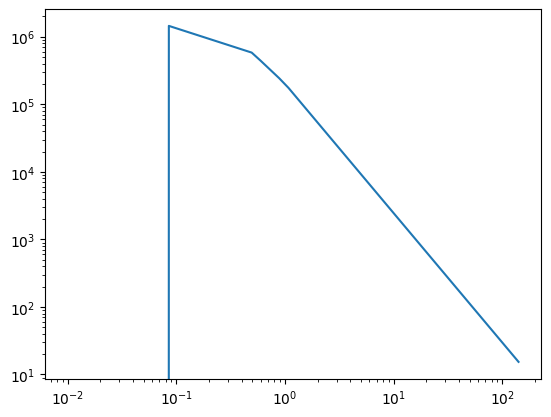

In [42]:
plt.loglog(m_star_v, IMF_inst.IMF(m_star_v))

### Test

In [43]:
IGIMF_params = IMF_inst.IGIMF_params

In [44]:
def integrate_powerlaw(lower_limit, upper_limit, exponent, weighted=False):
    """
    Integrate a power law function from a lower limit to an upper limit.

    .. math::
        I = \frac{upper_limit^{1-\text{exponent}} - lower_limit^{1-\text{exponent}}}{1-\text{exponent}}

    Parameters
    ----------
    lower_limit : float
        The lower limit of the integral.
    upper_limit : float
        The upper limit of the integral.
    exponent : float
        The exponent of the power law.

    Returns
    -------
    float
        The result of the integral.
    """
    if weighted == False:
        power = 1
    else:
        power = 2
    if np.isclose(power-exponent, 0):
        return np.log(upper_limit) - np.log(lower_limit)
    else:
        return (upper_limit**(power-exponent) - lower_limit**(power-exponent)) / (power-exponent)

In [45]:
def IMF_integrals(x, weighted=False):
    if np.logical_and(x >= IGIMF_params['Ml'], x < IGIMF_params['Mlim12']):
        I = (IGIMF_params['a1'] * integrate_powerlaw(x, IGIMF_params['Mlim12'], IGIMF_params['alpha1'], weighted=weighted) 
            +IGIMF_params['a2'] * integrate_powerlaw(IGIMF_params['Mlim12'], IGIMF_params['Mlim23'], IGIMF_params['alpha2'], weighted=weighted) 
            +IGIMF_params['a3'] * integrate_powerlaw(IGIMF_params['Mlim23'], IGIMF_params['Mu'], IGIMF_params['alpha3'], weighted=weighted))
    elif np.logical_and(x >= IGIMF_params['Mlim12'], x < IGIMF_params['Mlim23']):
        I = (IGIMF_params['a2'] * integrate_powerlaw(x, IGIMF_params['Mlim23'], IGIMF_params['alpha2'], weighted=weighted) 
            +IGIMF_params['a3'] * integrate_powerlaw(IGIMF_params['Mlim23'], IGIMF_params['Mu'], IGIMF_params['alpha3'], weighted=weighted))
    elif np.logical_and(x >= IGIMF_params['Mlim23'], x <= IGIMF_params['Mu']):
        I = IGIMF_params['a3'] * integrate_powerlaw(x, IGIMF_params['Mu'], IGIMF_params['alpha3'], weighted=weighted)
    else:
        I = 0.
    return I

In [46]:
for m in m_star_v:
    print(IMF_integrals(m))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
106881.48659825309
103185.53218627269
99125.95035991663
94666.96554358344
89769.28237257148
84389.73939773369
78480.92871977648
71990.7782011827
64862.09257394821
57032.049399086645
49141.08315471567
42006.78831746193
35558.983688796725
29763.583786371288
24841.56384562383
20724.640896945133
17281.124867064234
14400.866286598837
11991.732883891413
9976.662503959467
8291.198082804618
6881.425827070906
5702.250646573919
4715.95367509859
3890.9857381620204
3200.9581737912604
2623.7987251955583
2141.04550444986
1737.2564428527824
1399.5153377523427
1117.018695512216
880.7301547578609
683.0914357660643
517.7805699914684
379.5096760970344
263.8558138491978
167.11950531666113
86.20639781966426
18.5282833232999


Text(0, 0.5, '$\\int^{Mu,*}_x \\xi_{*}(m) {\\rm d}m$')

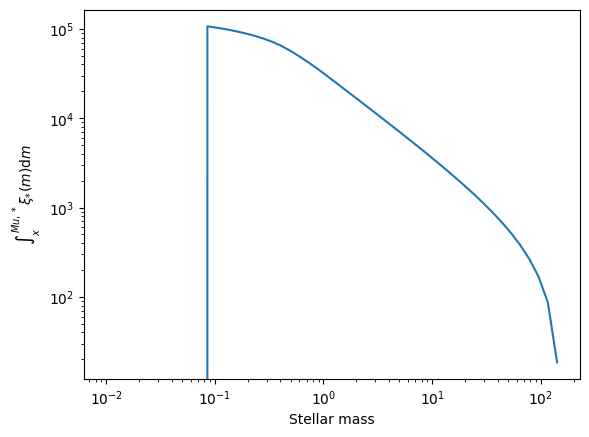

In [47]:
plt.loglog(m_star_v, [IMF_integrals(m) for m in m_star_v])
plt.xlabel('Stellar mass')
plt.ylabel(r'$\int^{Mu,*}_x \xi_{*}(m) {\rm d}m$')

In [48]:
def weighted_IMF_integrals(x, weighted=True):
    if np.logical_and(x >= IGIMF_params['Mlim23'], x <= IGIMF_params['Mu']):
        I = (IGIMF_params['a1'] * integrate_powerlaw(IGIMF_params['Ml'], IGIMF_params['Mlim12'], IGIMF_params['alpha1'], weighted=weighted) 
            +IGIMF_params['a2'] * integrate_powerlaw(IGIMF_params['Mlim12'], IGIMF_params['Mlim23'], IGIMF_params['alpha2'], weighted=weighted) 
            +IGIMF_params['a3'] * integrate_powerlaw(IGIMF_params['Mlim23'], x, IGIMF_params['alpha3'], weighted=weighted))
    elif np.logical_and(x >= IGIMF_params['Mlim12'], x < IGIMF_params['Mlim23']):
        I = (IGIMF_params['a1'] * integrate_powerlaw(IGIMF_params['Ml'], IGIMF_params['Mlim12'], IGIMF_params['alpha1'], weighted=weighted) 
            +IGIMF_params['a2'] * integrate_powerlaw(IGIMF_params['Mlim12'], x, IGIMF_params['alpha2'], weighted=weighted))
    elif np.logical_and(x >= IGIMF_params['Ml'], x < IGIMF_params['Mlim12']):
        I = IGIMF_params['a1'] * integrate_powerlaw(IGIMF_params['Ml'], x, IGIMF_params['alpha1'], weighted=weighted)
    else:
        I = 0.
    return I

In [49]:
for m in m_star_v:
    print(weighted_IMF_integrals(m))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
96.71589644091587
445.90096550784466
912.0279407264442
1534.2606083689273
2364.8786872730907
3473.6703481423892
4953.795785377359
6929.614496200308
9567.133911670175
13087.95726903328
17386.7162645081
22109.99471117502
27297.974108527465
32962.76175495247
38804.89009897138
44743.630497271224
50780.580636257226
56917.36462348726
63155.633424602274
69497.06530748178
75943.36629374465
82496.27061771638
89157.5411929866
95928.9700866814
102812.37900157989
109809.61976620226
116922.57483300366
124153.15778480622
131503.3138496058
138975.02042389274
146570.28760462636
154291.1587300071
162139.71092919118
170118.05568109648
178228.33938244852
186472.7439252216
194853.48728362782
203372.8241108143
212033.0463454275


Text(0, 0.5, '$\\int_{Ml}^x m \\xi_{*}(m) {\\rm d}m$')

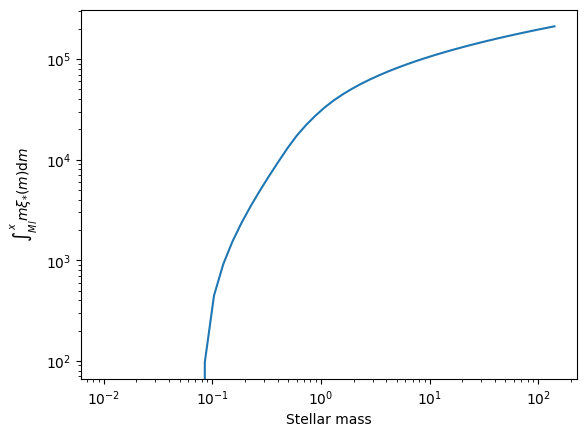

In [50]:
plt.loglog(m_star_v, [weighted_IMF_integrals(m) for m in m_star_v])
plt.xlabel('Stellar mass')
plt.ylabel(r'$\int_{Ml}^x m \xi_{*}(m) {\rm d}m$')

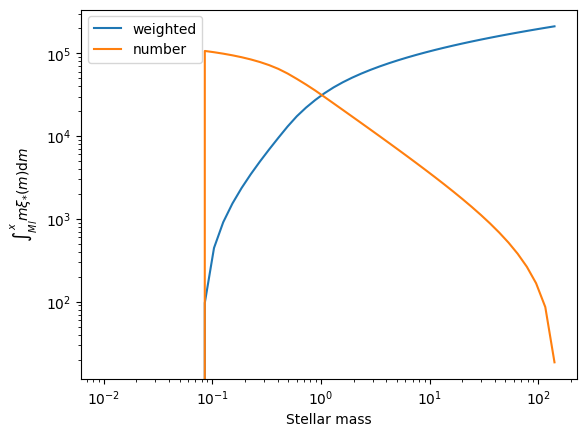

In [51]:
plt.loglog(m_star_v, [weighted_IMF_integrals(m) for m in m_star_v], label='weighted')
plt.loglog(m_star_v, [IMF_integrals(m) for m in m_star_v], label='number')
plt.xlabel('Stellar mass')
plt.ylabel(r'$\int_{Ml}^x m \xi_{*}(m) {\rm d}m$')
plt.legend()

In [52]:
def minimization_func(x, M_ecl):
    """
    The function to be minimized to find the normalization constant of the ECMF.
    
    Parameters
    ----------
    x : float
        The current guess for the upper limit.
    lower_lim : float
        The lower limit of the ECMF.
    beta : float
        The exponent of the power law.
    Mtot : float
        The total mass of the system.
    upper_lim : float
        The theoretical upper limit of the ECMF.
    
    Returns
    -------
    float
        The difference between the total mass and the integral of the ECMF.
    """
    I1 = weighted_IMF_integrals(x, weighted=True)
    I2 = IMF_integrals(x, weighted=False)

    return np.multiply(M_ecl, I2) - I1

Text(0, 0.5, '$M_{\\rm ecl} \\int^{Mu,*}_x \\xi_{*}(m) {\\rm d}m - \\int_{Ml}^x m \\xi_{*}(m) {\\rm d}m$')

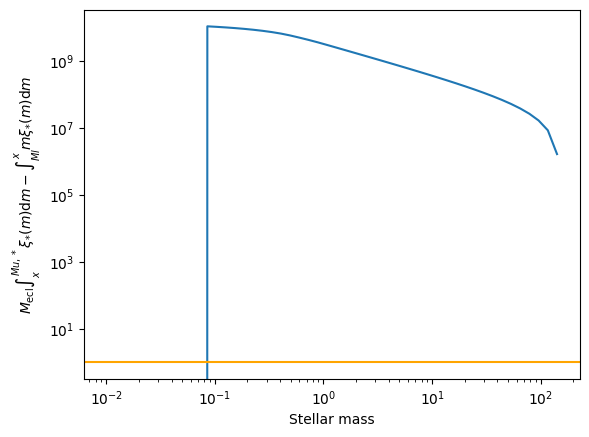

In [53]:
plt.loglog(m_star_v, [minimization_func(x, IMF_inst.M_ecl) for x in m_star_v])
plt.axhline(1, color='orange')
plt.xlabel('Stellar mass')
plt.ylabel(r'$M_{\rm ecl} \int^{Mu,*}_x \xi_{*}(m) {\rm d}m - \int_{Ml}^x m \xi_{*}(m) {\rm d}m$')

In [54]:
ECMF_inst.__dict__

{'SFR': 1,
 'metal_mass_fraction': None,
 'solar_metallicity': 0.0134,
 'delta_alpha': 63.0,
 'delta_t': 10000000.0,
 'm_star_min': 0.08,
 'm_star_max': 150.0,
 'M_ecl_min': 5.0,
 'M_ecl_max': 10000000000.0,
 'suppress_warnings': False,
 'Mtot': 10000000.0,
 'beta_ECMF': np.float64(2.0),
 'k_ecl': np.float64(831818.8110165405),
 'M_max': 831749.6245181675,
 'ECMF_func': <numpy.vectorize at 0x111ab0f30>,
 'ECMF_weighted_func': <numpy.vectorize at 0x111ab1150>}

In [55]:
def minimization_func_ECMF(x):
        I1 = integrate_powerlaw(ECMF_inst.M_ecl_min, x, ECMF_inst.beta_ECMF, weighted=True)
        I2 = integrate_powerlaw(x, ECMF_inst.M_ecl_max, ECMF_inst.beta_ECMF, weighted=False)
        return ECMF_inst.Mtot * I2 - I1

Text(0, 0.5, '$M_{\\rm tot} \\int^{M_{ecl,max*}}_x \\xi_{\\rm ecl}(M) {\\rm d}M - \\int_{M_{ecl,min}}^x M \\xi_{\\rm ecl}(M) {\\rm d}M$')

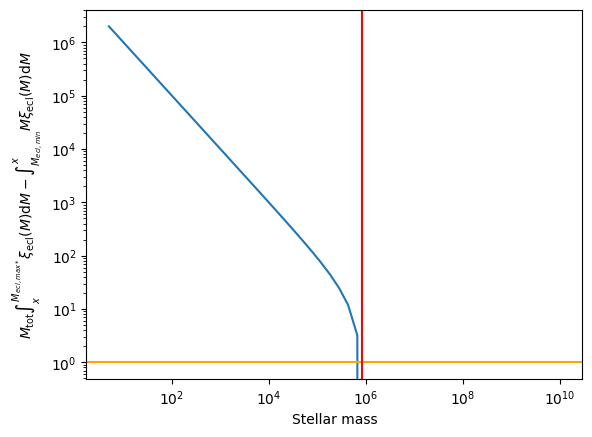

In [56]:
plt.loglog(M_ecl_v, [minimization_func_ECMF(x) for x in M_ecl_v])
plt.axhline(1, color='orange')
plt.axvline(ECMF_inst.M_max, color='red')
plt.xlabel('Stellar mass')
plt.ylabel(r'$M_{\rm tot} \int^{M_{ecl,max*}}_x \xi_{\rm ecl}(M) {\rm d}M - \int_{M_{ecl,min}}^x M \xi_{\rm ecl}(M) {\rm d}M$')

_______________________

In [ ]:
#IMF_inst.call_stellar_IMF()

Mtot = 100000.0, real_upper_limit/upper_lim = 0.9929016286966142, k = np.float64(0.4663978136138331)


In [59]:
IMF_inst.m_max

148.93524430449213

In [60]:
IMF_inst.k_star

np.float64(0.4663978136138331)

In [61]:
def k_IMF(x):
    if np.logical_and(x >= IGIMF_params['Ml'], x <= IGIMF_params['Mu']):
        k_IMF = IMF_integrals(x)
        return np.reciprocal(k_IMF)
    else:
        return 0.

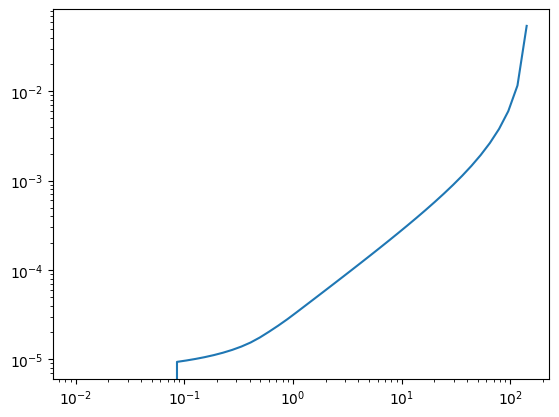

In [65]:
plt.loglog(m_star_v, [k_IMF(m) for m in m_star_v])

In [66]:
IMF_inst.m_max

148.93524430449213

In [68]:
k_IMF(IMF_inst.m_max) == IMF_inst.k_star

np.True_

In [62]:
IMF_inst.IMF_func(m_star_v)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.76231462e+05,
       6.11161783e+05, 5.52353366e+05, 4.99203730e+05, 4.51168363e+05,
       4.07755149e+05, 3.68519328e+05, 3.33058933e+05, 3.01010679e+05,
       2.72046235e+05, 2.04692585e+05, 1.52219065e+05, 1.13197279e+05,
       8.17027336e+04, 5.62305174e+04, 3.86996977e+04, 2.66344090e+04,
       1.83306792e+04, 1.26157783e+04, 8.68259497e+03, 5.97564838e+03,
       4.11263841e+03, 2.83045347e+03, 1.94801148e+03, 1.34068579e+03,
       9.22704200e+02, 6.35035480e+02, 4.37052373e+02, 3.00793866e+02,
       2.07016265e+02, 1.42475425e+02, 9.80562889e+01, 6.74855739e+01,
       4.64457989e+01, 3.19655315e+01, 2.19997337e+01, 1.51409427e+01,
       1.04204964e+01, 7.17172950e+00])

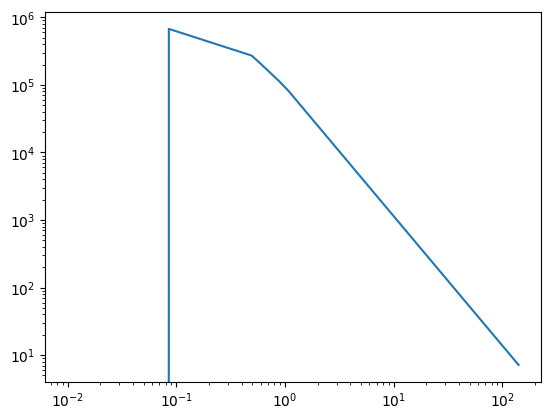

In [63]:
plt.loglog(m_star_v, IMF_inst.IMF_func(m_star_v))

## Test IMF optimal sampling